In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as plt 
import seaborn as sn

In [10]:
df_2 = pd.read_csv (r'..\installments_payments.csv') 

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [6]:
df_2['SK_ID_PREV'].nunique()

997752

In [11]:
Installment_Payments_Updt = df_2.rename(columns = {"NUM_INSTALMENT_NUMBER" :"ACTUAL_PAYMENT_NUMBER", #on which installment to we actually see a payment
                              "AMT_INSTALMENT": "ORIG_INSTALL_AMOUNT",
                              "AMT_PAYMENT": "ACTUAL_PAYMENT"})

In [12]:
Installment_Payments_Updt.shape

(13605401, 8)

In [13]:
#Selecting numeric columns
Installment_Payments_Updt_numeric_v2 = Installment_Payments_Updt.select_dtypes(include=[np.number]) 
numeric_cols_v2 = Installment_Payments_Updt_numeric_v2.columns.values
print(numeric_cols_v2)

['SK_ID_PREV' 'SK_ID_CURR' 'NUM_INSTALMENT_VERSION'
 'ACTUAL_PAYMENT_NUMBER' 'DAYS_INSTALMENT' 'DAYS_ENTRY_PAYMENT'
 'ORIG_INSTALL_AMOUNT' 'ACTUAL_PAYMENT']


In [14]:
#Selecting non numeric columns
Installment_Payments_Updt_numeric_v2_non_numeric_v2 = Installment_Payments_Updt_numeric_v2.select_dtypes(exclude=[np.number])
non_numeric_cols_v2 = Installment_Payments_Updt_numeric_v2_non_numeric_v2.columns.values
print(non_numeric_cols_v2)

[]


In [15]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in Installment_Payments_Updt.columns:
    pct_missing = np.mean(Installment_Payments_Updt[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))
"This produces a list below showing the percentage of missing values for each of the features."

SK_ID_PREV - 0.0%
SK_ID_CURR - 0.0%
NUM_INSTALMENT_VERSION - 0.0%
ACTUAL_PAYMENT_NUMBER - 0.0%
DAYS_INSTALMENT - 0.0%
DAYS_ENTRY_PAYMENT - 0.02135181462126695%
ORIG_INSTALL_AMOUNT - 0.0%
ACTUAL_PAYMENT - 0.02135181462126695%


'This produces a list below showing the percentage of missing values for each of the features.'

In [16]:
Installment_Payments_Updt.fillna(0, inplace = True)

In [17]:
Installment_Payments_Updt.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
ACTUAL_PAYMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
ORIG_INSTALL_AMOUNT       0
ACTUAL_PAYMENT            0
dtype: int64

In [18]:
matrix_table_1 = Installment_Payments_Updt.drop(['SK_ID_PREV','SK_ID_CURR'], inplace = False, axis=1)

<AxesSubplot:>

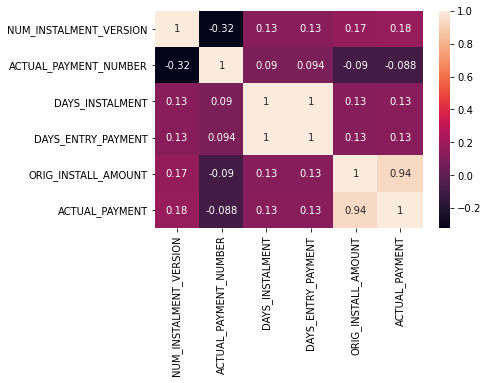

In [19]:
corrMatrix = matrix_table_1.corr()
sn.heatmap(corrMatrix, annot=True)

Reducing multiple entries to one entry with same old ID 

Steps to take for reduncing the entries 
1. Drop the column "NUM_INSTALMENT_VERSION" because it doesn't show any material information
2. For the column "ACTUAL_PAYMENT_NUMBER" get the count
3. Column "DAYS_ENTRY_PAYMENT" is highly correlated with "DAYS_INSTALMENT" therefore, we can drop one of those columns or decide to sum both of them up and search for differences. As one column gives us when the installment was supposed to be paid and the other column gives us when it actually got paid. (Should vs actual)  
4. For the column "ORIG_INSTALL_AMOUNT" sum it all up 
5. for the column "ACTUAL_PAYMENT" sum it all up.

In [20]:
Installment_Payments_Updt[Installment_Payments_Updt['SK_ID_PREV']==2085231]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,ACTUAL_PAYMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,ORIG_INSTALL_AMOUNT,ACTUAL_PAYMENT
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
181872,2085231,193053,3.0,1,-44.0,-21.0,631.035,631.035
2236835,2085231,193053,3.0,2,-14.0,-21.0,8393.175,8393.175


In [22]:
Installment_Payments_Final = Installment_Payments_Updt.groupby(["SK_ID_CURR"]).agg(
{"ACTUAL_PAYMENT_NUMBER": "count",'DAYS_INSTALMENT':'sum', "DAYS_ENTRY_PAYMENT":'sum',
'ORIG_INSTALL_AMOUNT': 'sum',
'ACTUAL_PAYMENT': 'sum'}).reset_index()

In [23]:
Installment_Payments_Final.head()

,SK_ID_CURR,ACTUAL_PAYMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,ORIG_INSTALL_AMOUNT,ACTUAL_PAYMENT
0,100001,7,-15314.0,-15365.0,41195.925,41195.925
1,100002,19,-5605.0,-5993.0,219625.695,219625.695
2,100003,25,-34454.0,-34633.0,1618864.650,1618864.650
3,100004,3,-2262.0,-2285.0,21288.465,21288.465
4,100005,9,-5274.0,-5486.0,56161.845,56161.845


In [24]:
Installment_Payments_Final[Installment_Payments_Final['SK_ID_PREV']==2085231]

KeyError: 'SK_ID_PREV'

In [41]:
Installment_Payments_Updt.groupby("SK_ID_CURR").agg(
{"ACTUAL_PAYMENT_NUMBER": "count",'DAYS_INSTALMENT':'sum', "DAYS_ENTRY_PAYMENT":'sum',
'ORIG_INSTALL_AMOUNT': 'sum',
'ACTUAL_PAYMENT': 'sum'}).reset_index().shape

(339587, 6)

In [42]:
Installment_Payments_Updt.groupby('SK_ID_PREV').agg(
{"ACTUAL_PAYMENT_NUMBER": "count",'DAYS_INSTALMENT':'sum', "DAYS_ENTRY_PAYMENT":'sum',
'ORIG_INSTALL_AMOUNT': 'sum',
'ACTUAL_PAYMENT': 'sum'}).reset_index().shape

(997752, 6)

In [26]:
Installment_Payments_Final['SK_ID_PREV'].nunique()

997752

In [27]:
Installment_Payments_Final['SK_ID_CURR'].nunique()

339587

In [45]:
CCB_IP_v1 = Installment_Payments_Final.copy()



CCB_IP_v1['Unique_id'] = CCB_IP_v1['SK_ID_PREV'] + CCB_IP_v1['SK_ID_CURR']



CCB_IP_v1['Unique_id'].nunique()


784294

In [39]:
CCB_IP_v1.shape

(997752, 8)

In [40]:
997752 - 784294

213458

# Remarks:
1. Make a decision regarding the column "DAYS_ENTRY_PAYMENT" as it is highly correlated with "DAYS_INSTALMENT" therefore, we can drop one of those columns or decide to sum both of them up and search for differences. As one column gives us when the installment was supposed to be paid and the other column gives us when it actually got paid. (Should vs actual)  

2. Compare the column "ORIG_INSTALL_AMOUNT" and "ACTUAL_PAYMENT". If somebody paid the loan to the last cent, then both of the amounts should match accordingly. 

In [15]:
# only having the difference "DAYS_ENTRY_PAYMENT" and "DAYS_INSTALMENT" and having a column for it 

In [25]:
Installment_Payments_Final.to_csv("Installment_Payments_F_v2.csv", index = None)

In [26]:
Installment_Payments_Final.shape

(339587, 6)